# Decision Tree and Random Forest

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Kaggle Data Download

In [4]:
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          18277        361  0.9411765        
jatinthakur706/most-watched-netflix-original-shows-tv-time  Most watched Netflix original shows (TV Time)    2KB  2024-03-27 09:01:21           1507         24  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1259         25  1.0              
samira1992/diabetes-intermediate-dataset                    🩸 Diabetes - Intermediate 🗃️ Dataset         

In [5]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset --force


  0%|          | 0.00/4.11k [00:00<?, ?B/s]
100%|██████████| 4.11k/4.11k [00:00<00:00, 1.40MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('heart-attack-analysis-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

### Read File

[Dataset Description](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [7]:
df = pd.read_csv("heart.csv")

In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df["output"].unique()

array([1, 0], dtype=int64)

## Exploratory Data Analysis

In [10]:
ages_group = df.groupby('age').median().reset_index()

ages_group.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


<Axes: xlabel='age'>

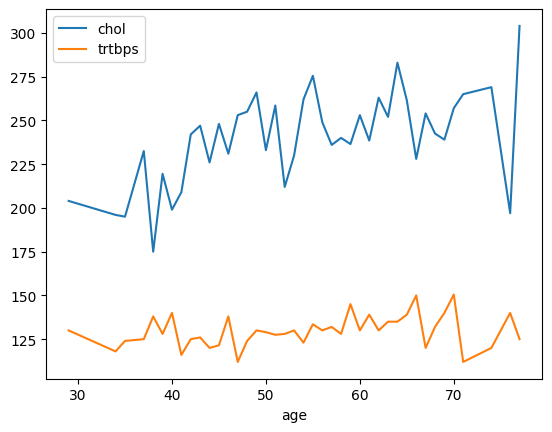

In [11]:
ages_group.plot.line("age", ["chol","trtbps"]) #", thalachh"])

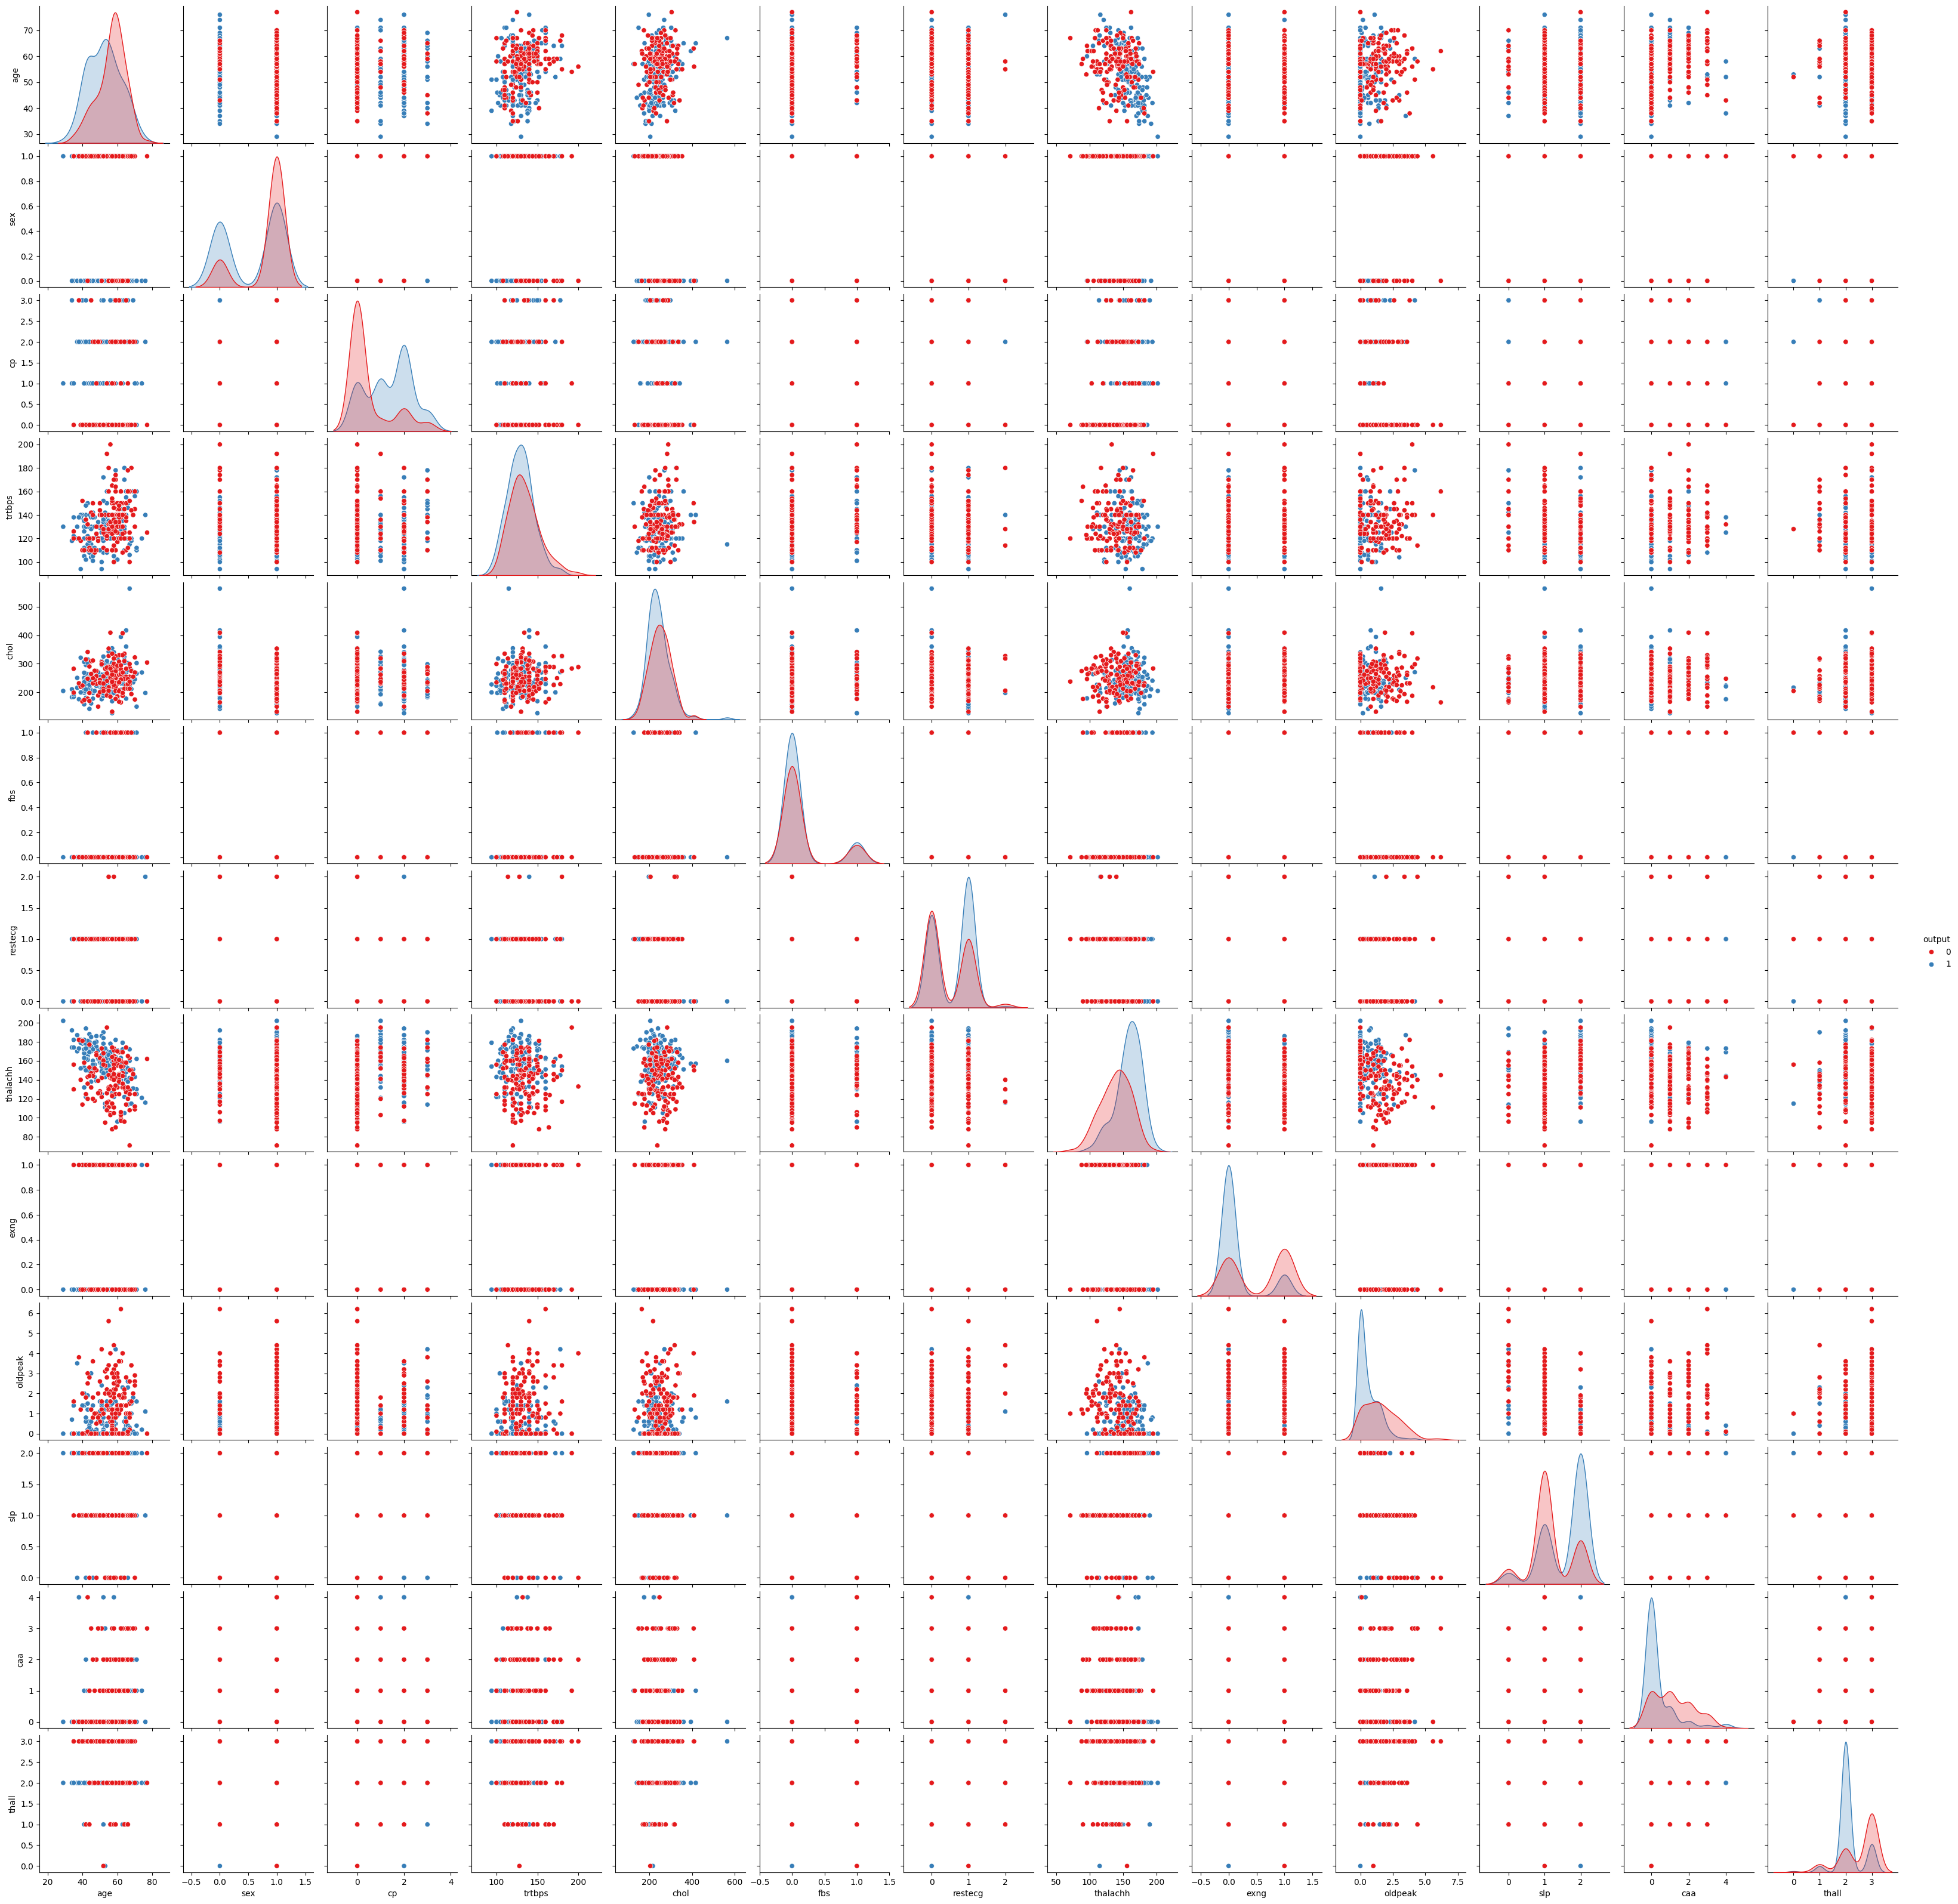

In [12]:
sns.pairplot(df, hue="output", palette= "Set1")

<Axes: >

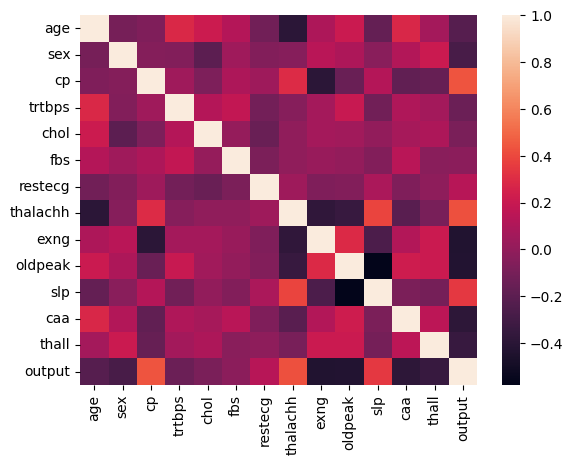

In [13]:
df.corr()
sns.heatmap(df.corr())

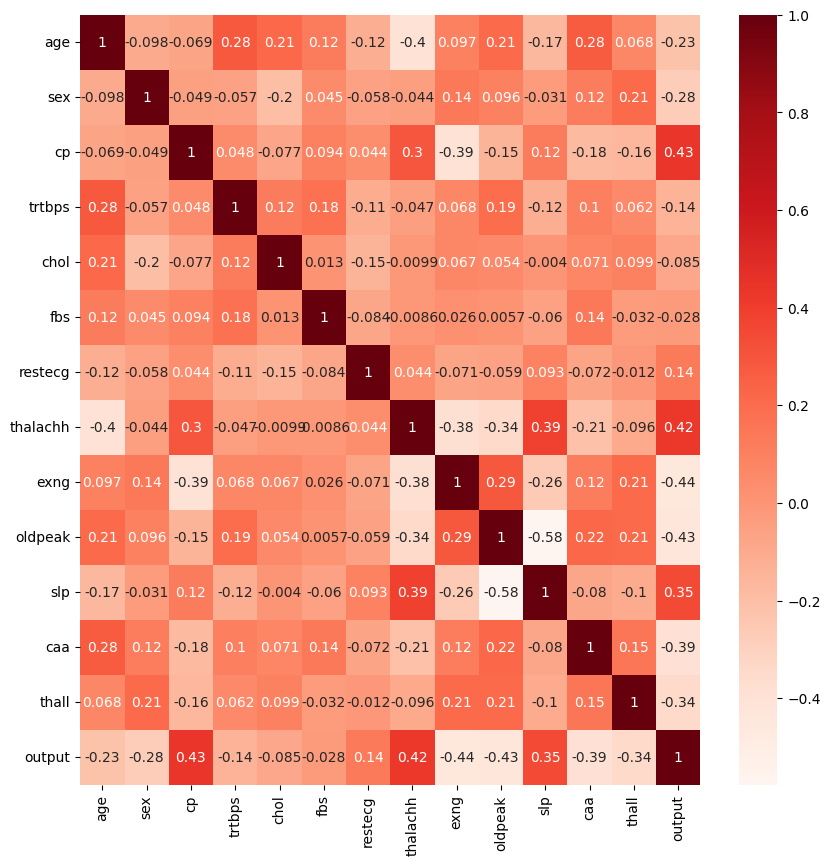

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
_ = df[df.columns].nunique();
display(pd.concat((df[df.columns].describe().transpose().drop(['count'], axis =1), _), axis=1).\
        rename(columns={0: 'nunique'}).style.format('{:,.2f}'));

,mean,std,min,25%,50%,75%,max,nunique
age,54.37,9.08,29.00,47.50,55.00,61.00,77.00,41.00
sex,0.68,0.47,0.00,0.00,1.00,1.00,1.00,2.00
cp,0.97,1.03,0.00,0.00,1.00,2.00,3.00,4.00
trtbps,131.62,17.54,94.00,120.00,130.00,140.00,200.00,49.00
chol,246.26,51.83,126.00,211.00,240.00,274.50,564.00,152.00
fbs,0.15,0.36,0.00,0.00,0.00,0.00,1.00,2.00
restecg,0.53,0.53,0.00,0.00,1.00,1.00,2.00,3.00
thalachh,149.65,22.91,71.00,133.50,153.00,166.00,202.00,91.00
exng,0.33,0.47,0.00,0.00,0.00,1.00,1.00,2.00
oldpeak,1.04,1.16,0.00,0.00,0.80,1.60,6.20,40.00


In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [18]:
cat_cols=['sex', 'cp', 'fbs', 'restecg','exng', 'slp', 'caa', 'thall', 'output']
df[cat_cols] = df[cat_cols].astype('category')



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [20]:
def plot_graphs(data,feature, figsize=(12,7), kde=False):
    
# f2, (ax_box2, ax_hist2) = plt.subplots(
#     nrows=1,  # Number of rows
#     sharex=True,  # Share the x-axis
#     #gridspec_kw={"height_ratios": (0.25, 0.75)},  # Set the height ratios
#     figsize=figsize
    
    # creating subplots
    # plt.figsize=(12,7)
    # plt.title(f"Header: {feature}")
# check for integer type or categorical type before plotting
    # try:
    #     sns.countplot(data=data, x="output", hue=feature, ax=ax_box2)
    #     sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    # except:
    if data[feature].dtypes == 'int64':
        plt.figsize=(12,7)
        plt.title(f"Header: {feature}")
        sns.histplot(data=data, x=feature, kde=kde) #ax=ax_hist2)
        plt.show()
    else:
        plt.figsize=(12,7)
        sns.countplot(data=data, x="output", hue= feature) #, ax=ax_box2) 
        plt.title(f"Header: {feature}")
        plt.show()   

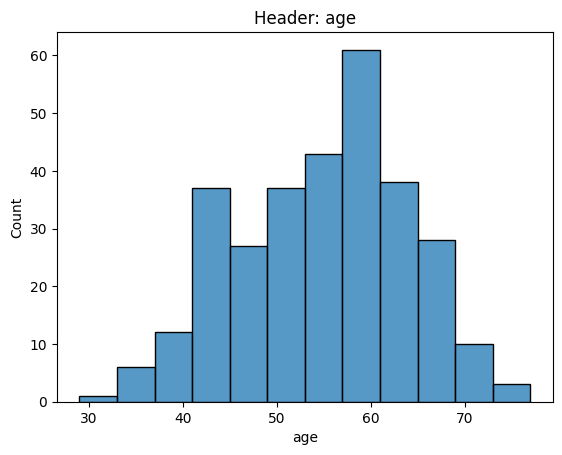

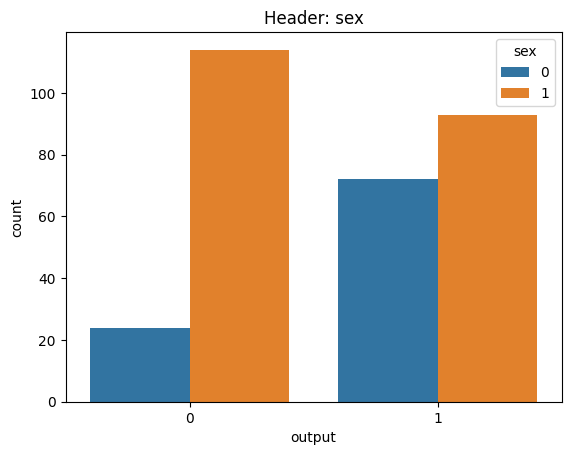

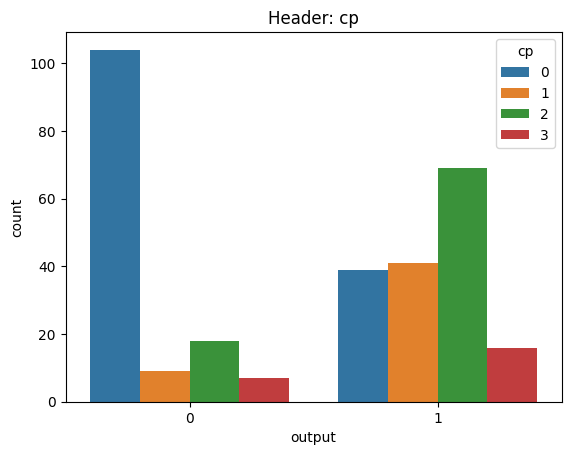

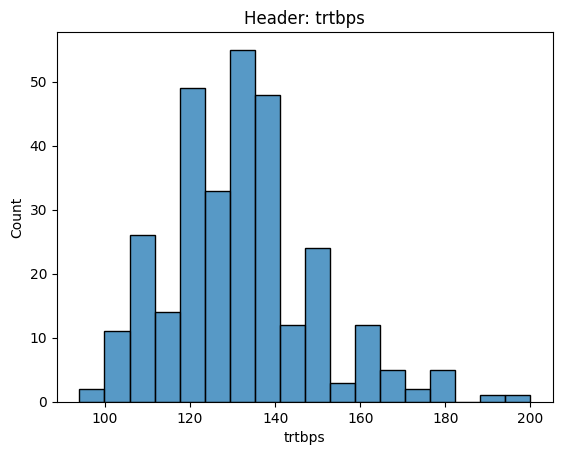

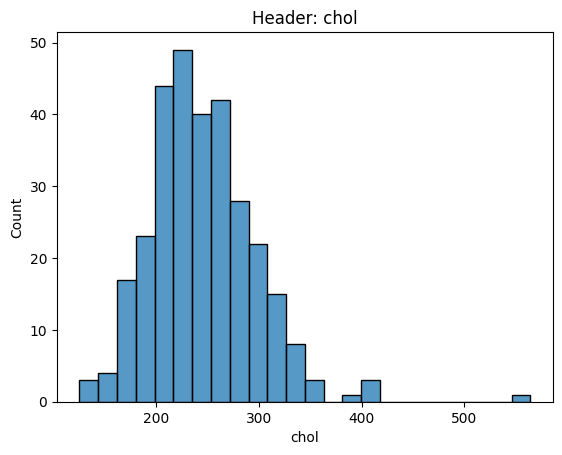

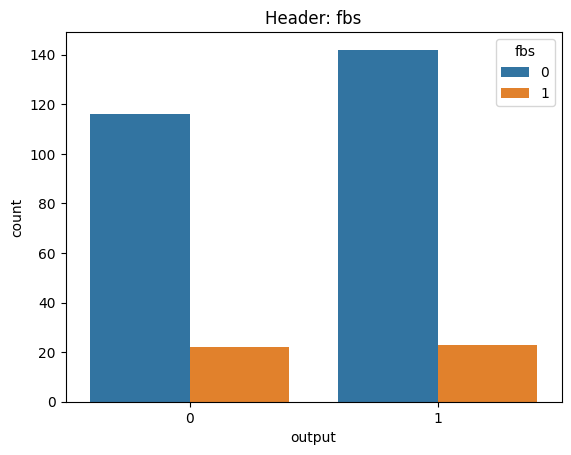

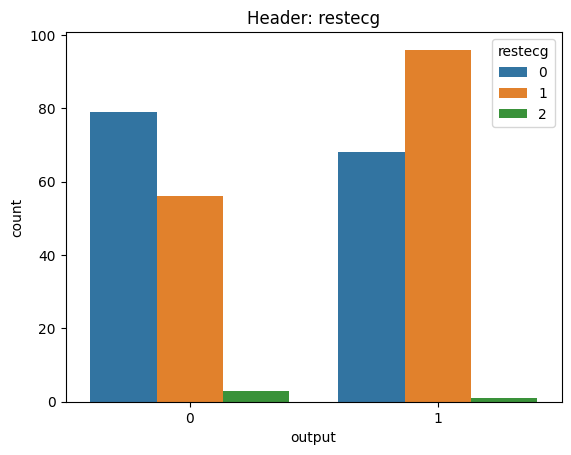

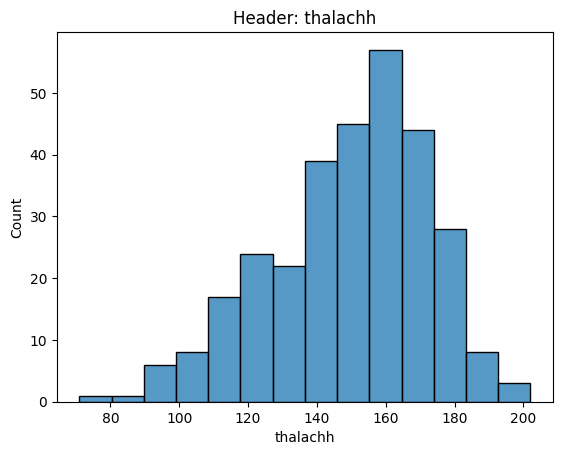

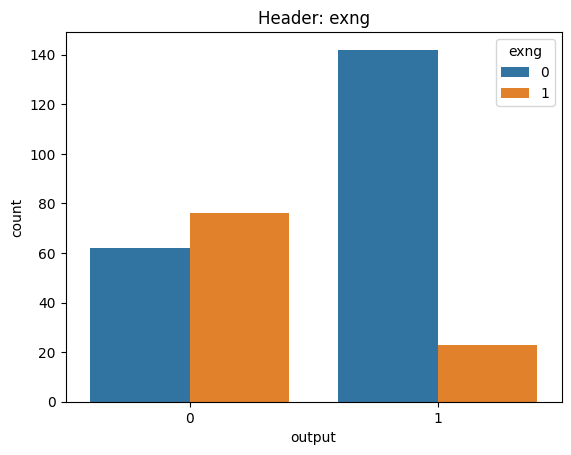

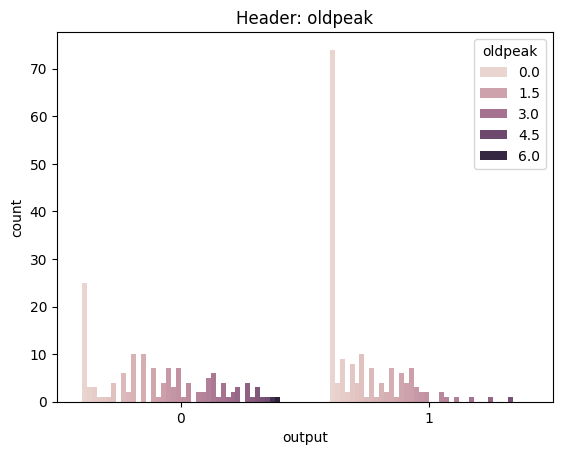

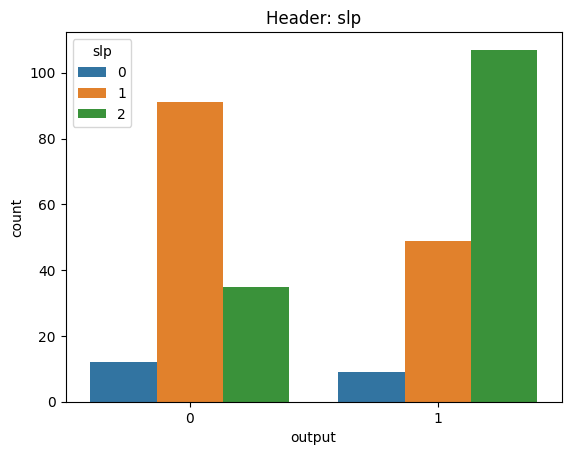

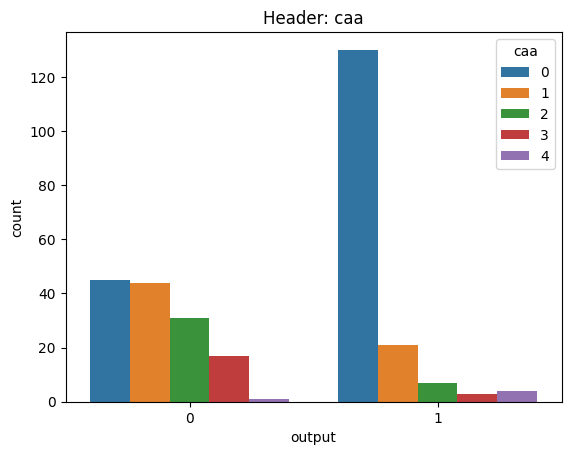

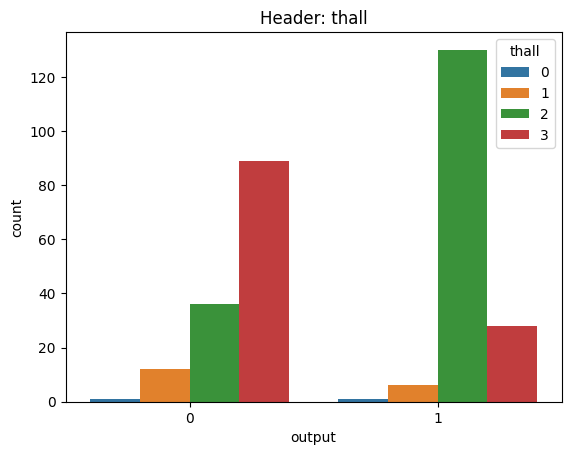

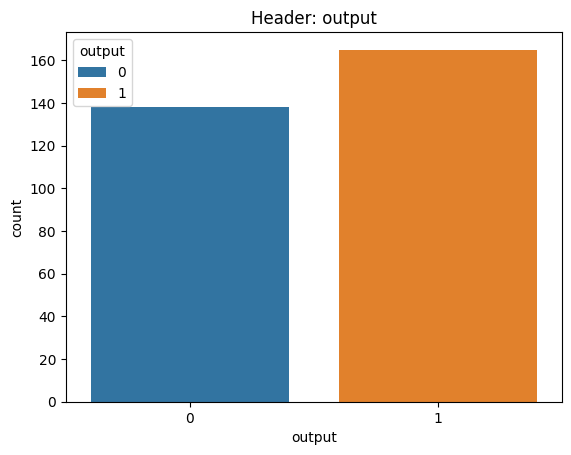

In [21]:
for col in df.columns :
    
    plot_graphs(df, col) #,kde=True)

In [22]:
df[cat_cols] = df[cat_cols].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [26]:
X = df.drop("output", axis=1)
y = df["output"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [31]:
predictions = dt.predict(X_test)

In [70]:
from sklearn.metrics import roc_curve,classification_report,confusion_matrix,accuracy_score

In [33]:
print(roc_curve(y_test, predictions))

(array([0.        , 0.15384615, 1.        ]), array([0.        , 0.65384615, 1.        ]), array([inf,  1.,  0.]))


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        39
           1       0.85      0.65      0.74        52

    accuracy                           0.74        91
   macro avg       0.75      0.75      0.74        91
weighted avg       0.76      0.74      0.74        91



In [35]:
print(confusion_matrix(y_test,predictions))

[[33  6]
 [18 34]]


## Tree Visualization

In [36]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [37]:
# from sklearn.tree import export_graphviz
# import pydot
# from io import StringIO
# from IPython.display import Image

# features = list(df.columns[1:])
# features

In [38]:
# dot_data = StringIO()
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# # Specify the path where the image should be saved
# image_path = "decision_tree.png"

# # Convert the graph to an image and save it
# graph.write_png(image_path)

In [39]:
from six import StringIO

from IPython.display import Image
# from sklearn.externals.six import StringIO

from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [49]:
dot_data = StringIO()
export_graphviz(dt, out_file="tree.dot",feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data("tree.dot")
Image(graph[0].create_png())

tree.dot
^
Expected {'GRAPH' | 'DIGRAPH'}, found 'tree'  (at char 0), (line:1, col:1)


TypeError: 'NoneType' object is not subscriptable

In [47]:
# dot_data = StringIO()

# Export the decision tree into a Graphviz format
export_graphviz(dt, out_file="tree.dot", feature_names=features, filled=True, rounded=True)

# Convert the Graphviz format into a graph
(graph,) = pydot.graph_from_dot_data("tree.dot")

# Specify the path to the Graphviz executable
# pydot.find_graphviz()
#pydot.Dot.create(prog='dot', format='png')
#pydot.Dot.create(prog='dot', format='png', options="-Kdot -Tpng -Gdpi=300 -o decision_tree.png")

# Specify the path where the image should be saved
image_path = "decision_tree.png"

# Convert the graph to an image and save it
graph.write_png(image_path)

tree.dot
^
Expected {'GRAPH' | 'DIGRAPH'}, found 'tree'  (at char 0), (line:1, col:1)


TypeError: cannot unpack non-iterable NoneType object

In [42]:
export_graphviz(dt)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[12] <= 2.5\\ngini = 0.498\\nsamples = 212\\nvalue = [99.0, 113.0]"] ;\n1 [label="x[11] <= 0.5\\ngini = 0.383\\nsamples = 128\\nvalue = [33, 95]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[9] <= 1.7\\ngini = 0.236\\nsamples = 88\\nvalue = [12, 76]"] ;\n1 -> 2 ;\n3 [label="x[7] <= 83.5\\ngini = 0.162\\nsamples = 79\\nvalue = [7, 72]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n3 -> 4 ;\n5 [label="x[8] <= 0.5\\ngini = 0.142\\nsamples = 78\\nvalue = [6, 72]"] ;\n3 -> 5 ;\n6 [label="x[4] <= 325.5\\ngini = 0.061\\nsamples = 63\\nvalue = [2, 61]"] ;\n5 -> 6 ;\n7 [label="x[3] <= 109.0\\ngini = 0.033\\nsamples = 60\\nvalue = [1, 59]"] ;\n6 -> 7 ;\n8 [label="x[1] <= 0.5\\ngini = 0.278\\nsamples = 6\\nvalue = [1, 5]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 1\\n

In [52]:
from sklearn.tree import export_graphviz
import graphviz


ModuleNotFoundError: No module named 'graphviz'

In [53]:
%pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 396.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree model to a Graphviz dot file
export_graphviz(dt, out_file='tree.dot',
                feature_names=X.columns,
                # class_names=['0', '1'],
                filled=True, rounded=True,
                special_characters=True)

# Convert the dot file to a visualization format using Graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Random Forest


In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[29 10]
 [ 8 44]]


In [58]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        39
           1       0.81      0.85      0.83        52

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91



In [59]:
#for decision Tree
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        39
           1       0.85      0.65      0.74        52

    accuracy                           0.74        91
   macro avg       0.75      0.75      0.74        91
weighted avg       0.76      0.74      0.74        91



In [61]:
%pip install Xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 558.5 kB/s eta 0:02:59
   ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:36
   ---------------------------------------- 0.4/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.8/99.8 MB 3.8 MB/s eta 0:00:27
    --------------------------------------- 1.5/99.8 MB 5.5 MB/s eta 0:00:18
   - -------------------------------------- 2.7/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 4.2/99.8 MB 12.3 MB/s eta 0:00:08
   -- ------------------------------------- 5.5/99.8 MB 14.6 MB/s eta 0:00:07
   -- ------------------------------------- 7.3/99.8 MB 17.3 MB/s eta 0:00:06
   --- ------

In [62]:
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

In [63]:
#creating pipelines
pipelines = {
    'XGBoost': Pipeline([
        ('model', XGBClassifier())
    ]),
       'Decision Tree': Pipeline([
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(random_state=42))
    ])
}

In [66]:
pipelines['XGBoost']

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [67]:
pipelines.keys()

dict_keys(['XGBoost', 'Decision Tree', 'Random Forest'])

In [68]:
pipelines.items()

dict_items([('XGBoost', Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                       

In [74]:
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y)))
    print('classification_report:')
    print(class_report)
    print("\n \n")

Model: XGBoost
Accuracy: 0.8461538461538461
Confusion Matrix:
    0   1
0  28  11
1   3  49
classification_report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.82      0.94      0.88        52

    accuracy                           0.85        91
   macro avg       0.86      0.83      0.84        91
weighted avg       0.85      0.85      0.84        91


 

Model: Decision Tree
Accuracy: 0.7472527472527473
Confusion Matrix:
    0   1
0  34   5
1  18  34
classification_report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.75        39
           1       0.87      0.65      0.75        52

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.75        91
weighted avg       0.78      0.75      0.75        91


 

Model: Random Forest
Accuracy: 0.8241758241758241
Confusion Matrix:
    0   1
0  29  10
1   6  46
clas